In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Loading data in

In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### We're trying to predict the 'diagnosis' (i.e. is it Malignant, M, or is it Benign, B)

In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Let's start by dropping the 'id' column and the 'Unnamed: 32' column

In [6]:
cols_to_drop = ['id', 'Unnamed: 32']
df = df.drop(cols_to_drop, axis=1)

# Pre-processing

In [7]:
#Wrapper for 'diagnosis' (i.e. M = 0, B = 1)
wrapper = {'M':0, 'B':1}
df.diagnosis = df.diagnosis.replace(wrapper)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Creating a baseline model for which to improve upon later

## Splitting and scaling data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def split_data(df):
    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']
    return X, y

In [11]:
X, y = split_data(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

#### Making pipeline

In [12]:
scaler = MinMaxScaler()
model = LogisticRegression()

In [13]:
pipe = Pipeline(steps=[('scaler', scaler), ('model', model)])

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [15]:
y_preds = pipe.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

## Metrics for evaluation

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
print(f'The accuracy between X_test and y_test is: {pipe.score(X_test, y_test)}\nThe accuracy between X_train and y_train is: {pipe.score(X_train, y_train)}')

The accuracy between X_test and y_test is: 0.9790209790209791
The accuracy between X_train and y_train is: 0.9671361502347418


In [18]:
print(classification_report(y_test, y_preds, target_names=['Metastasis', 'Benign']))

              precision    recall  f1-score   support

  Metastasis       0.98      0.96      0.97        54
      Benign       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



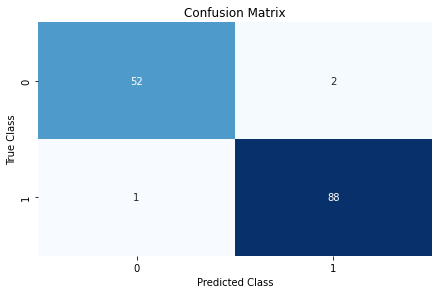

0: Metastasis (M)
1: Benign (B)


In [19]:
matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()
print('0: Metastasis (M)\n1: Benign (B)')

### Let's improve on this!

# Back to the drawing board - EDA

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


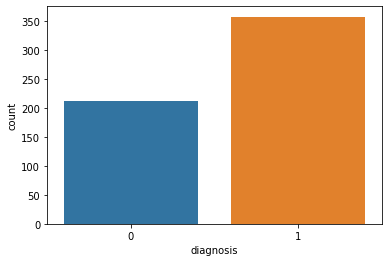

In [21]:
sns.countplot(df.diagnosis);

## Outlier analysis
#### Box plots

In [22]:
from scipy.stats import zscore

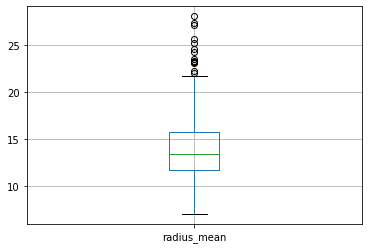

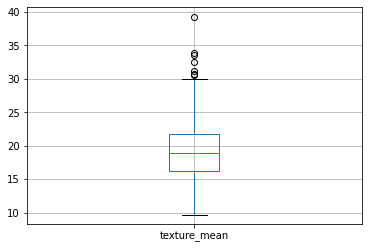

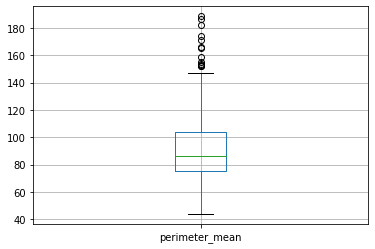

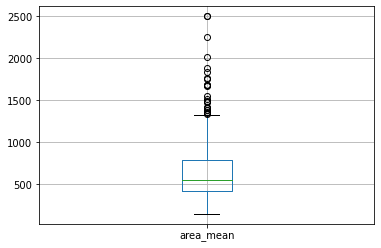

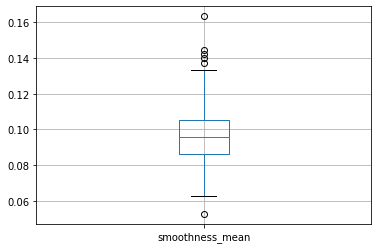

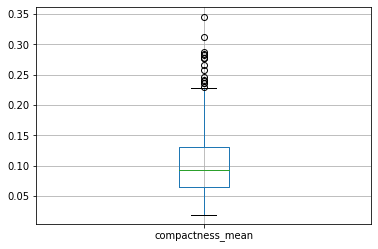

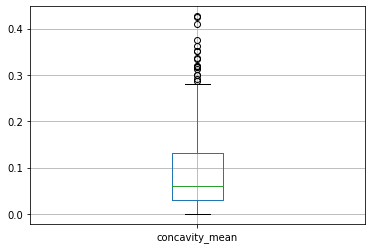

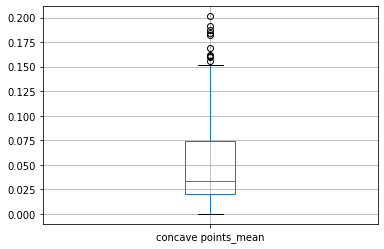

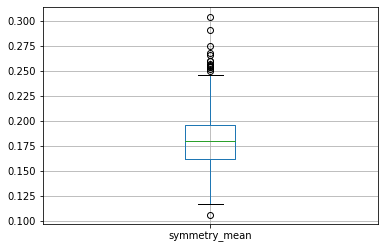

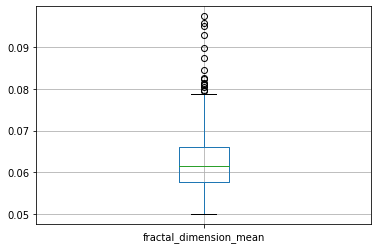

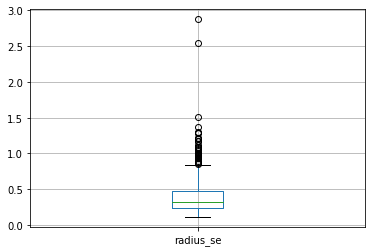

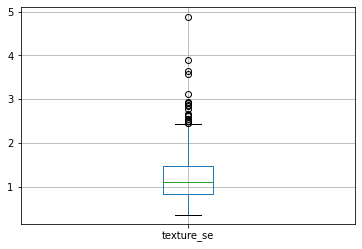

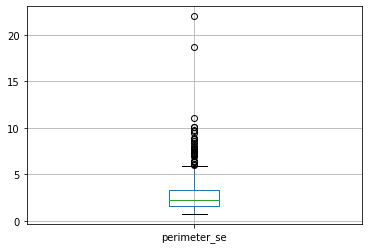

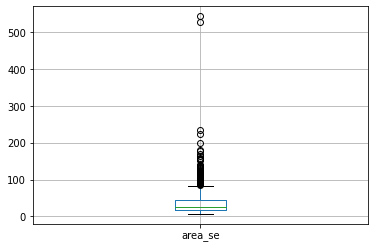

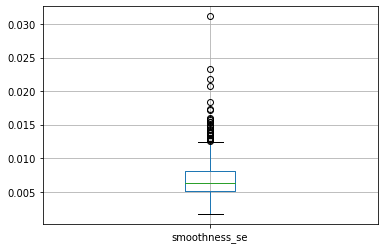

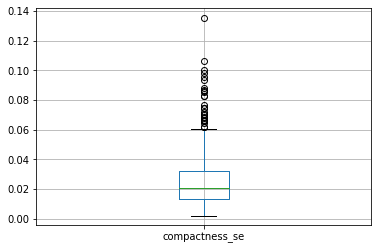

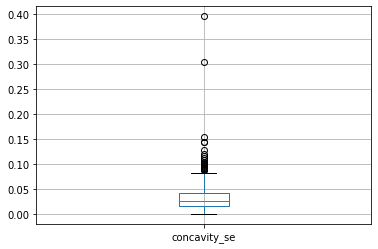

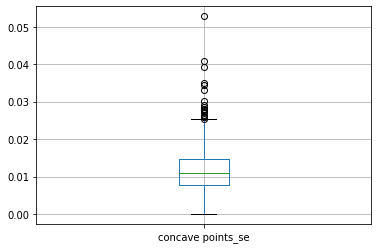

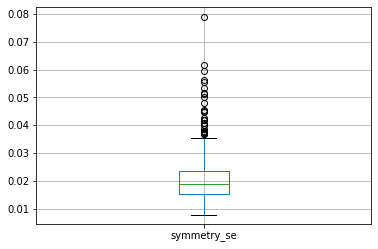

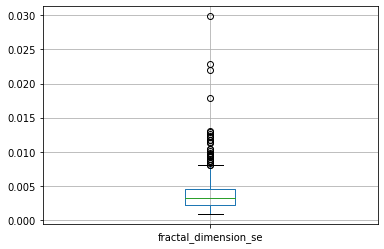

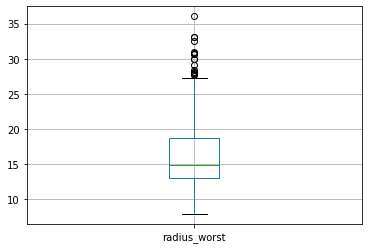

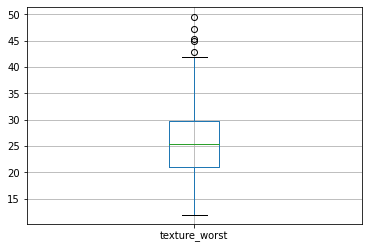

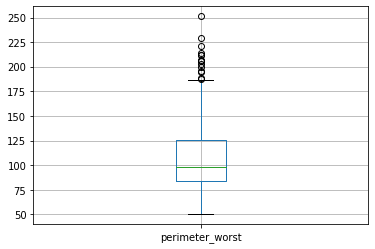

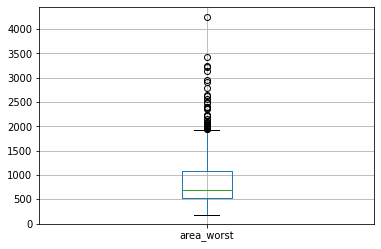

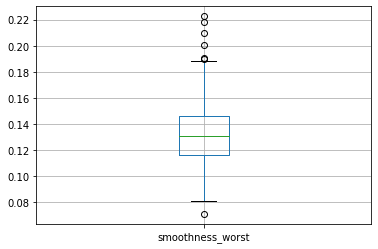

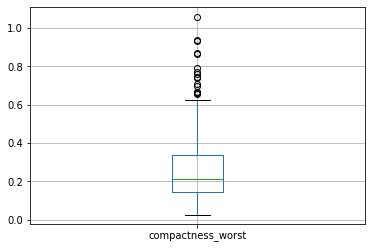

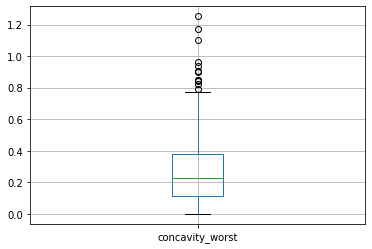

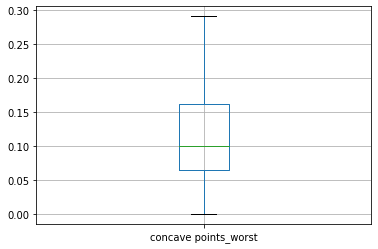

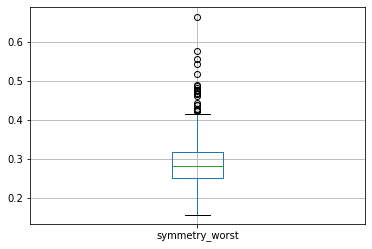

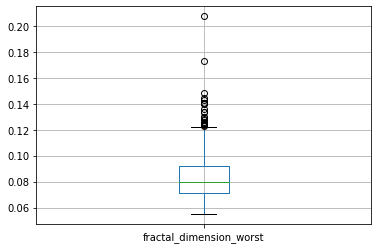

In [23]:
cols = df.columns[1:] #Exclude the first column (since it's diagnosis)
for col in cols:
    df.boxplot(col)
    plt.show()

While there are lots of values that are seemingly outliers, they are inherently not. However, some of the columns that we can choose to look in to are of the following:

fractal_dimension_worst, symmetry_worst, fractal_dimension_se, symmetry_se, concave points_se, concavity_se, compactness_se, smoothness_se, area_se, perimeter_se, texture_se, radius_se


#### Z-score analysis
(make new DF's for z-scores and VIF's and then filter the original DF based on those [i.e., if it falls within the threshold or not])

In [24]:
from scipy.stats import zscore

In [25]:
# z_df = pd.DataFrame() #Making a new DataFrame for which to gather all the z-scores
# def gen_zscores(df, col, df2):
#     df2['zscore_'+col] = zscore(df[col])
    
# [gen_zscores(df=df, col=nc, df2=z_df) for nc in df.columns[1:]] # This will add the new columns all at the end of the current df

# z_df

In [26]:
# columns_to_examine = ['zscore_fractal_dimension_worst', 'zscore_symmetry_worst', 'zscore_fractal_dimension_se', 'zscore_symmetry_se', 'zscore_concave points_se', 'zscore_concavity_se', 'zscore_compactness_se', 'zscore_smoothness_se', 'zscore_area_se', 'zscore_perimeter_se', 'zscore_texture_se', 'zscore_radius_se']

In [27]:
# drop = [] #We use this list to keep track of indices we want to get rid of

# for i, column in enumerate(columns_to_examine):
#     drop.append(z_df.index[z_df[columns_to_examine[i]] > 9].tolist())
    
# drop

I've decided on picking a z-score of anything greater than 5.0 to be excluded from our model training. For reference, a z-score of 3 encompasses nearly 99% of the population.

In [28]:
# # Convert the list 'drop' from a list of lists into a set
# outer_list = []
# def lists_to_list(nested_lists): 
#     for el in nested_lists: 
#         if type(el) == list: 
#             lists_to_list(el) 
#         else: 
#             outer_list.append(el)
#     return set(outer_list)

# indices_to_drop = lists_to_list(drop)
# print(f'Set of indices to drop: {indices_to_drop}, \nLength of set: {len(indices_to_drop)}')

In [29]:
# # Dropping all the rows from 'df' with indices from the above set
# df = df.drop(indices_to_drop, axis=0)

## Multicollinearity Analysis

#### Variance Inflation Factor (VIF)
https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc

https://www.youtube.com/watch?v=Mq2sce8TjLw

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [31]:
# Create a function to generate the VIF's for each feature
def gen_VIF(columns, df=df):
    df = df.copy()
    feature_df = df[columns]
    vif_data_out = pd.DataFrame()
    vif_data_out['Feature'] = feature_df.columns
    vif_data_out['VIF'] = [vif(feature_df.values, i) for i in range(len(feature_df.columns))]
    
    return vif_data_out

In [32]:
X_var_mean = ['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
X_var_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se' ,'smoothness_se' ,'compactness_se' ,'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
X_var_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [33]:
gen_VIF(X_var_mean)

,Feature,VIF
0,radius_mean,27447.771770
1,texture_mean,23.933372
2,perimeter_mean,29501.347528
3,area_mean,157.954975
4,smoothness_mean,136.564939
5,compactness_mean,81.953895
6,concavity_mean,26.049705
7,concave points_mean,52.400513
8,symmetry_mean,74.980219
9,fractal_dimension_mean,193.849464


'radius_mean' and 'perimeter_mean' show signs of multi-colinearity

In [34]:
# df = df.drop('radius_mean', axis=1)

In [35]:
gen_VIF(X_var_se)

,Feature,VIF
0,radius_se,86.702093
1,texture_se,7.706940
2,perimeter_se,76.861387
3,area_se,26.625721
4,smoothness_se,9.261231
5,compactness_se,15.352177
6,concavity_se,8.157192
7,concave points_se,16.555154
8,symmetry_se,9.804762
9,fractal_dimension_se,11.105938


'radius_se' and 'perimeter_se' show signs of multi-colinearity

In [36]:
# df = df.drop('radius_se', axis=1)

In [37]:
gen_VIF(X_var_worst)

,Feature,VIF
0,radius_worst,1576.484468
1,texture_worst,22.648946
2,perimeter_worst,1434.831269
3,area_worst,57.122238
4,smoothness_worst,67.306324
5,compactness_worst,34.075212
6,concavity_worst,19.049757
7,concave points_worst,36.332374
8,symmetry_worst,38.812700
9,fractal_dimension_worst,86.164311


'radius_worst' and 'perimeter_worst' show signs of multi-colinearity

In [38]:
# df = df.drop('radius_worst', axis=1)

## Additional Feature Exploration methods

#### ANOVA F-Value Analysis

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:
def ANOVA_F_val_scores(df, k):

    X, y = split_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

    # Feature selection using ANOVA F-value
    def select_features(X_train, y_train, X_test, k):

    #     fs = SelectKBest(score_func=f_classif, k='all')
        fs = SelectKBest(score_func=f_classif, k=k) #'k' best features

        fs.fit(X_train, y_train)

        X_train_fs = fs.transform(X_train)
        X_test_fs = fs.transform(X_test)

        return X_train_fs, X_test_fs, fs
    
    #Running the function above
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, k=k)
    
    #Feed into pipeline
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear'))])
    
    #Fit the pipeline on our data that was selected using 'SelectKBest' and the defined 'k'
    pipe.fit(X_train_fs, y_train)
    
    #Output the pipeline accuracy score
    return pipe.score(X_test_fs, y_test)

In [41]:
score = ANOVA_F_val_scores(df, k='all')
score

0.951048951048951

In [42]:
score_25 = ANOVA_F_val_scores(df, k=25)
score_25

0.951048951048951

In [43]:
print(f'The score for the pipeline with k = 25 is: {score_25}\nThe score for the pipeline with k = all is: {score}')

The score for the pipeline with k = 25 is: 0.951048951048951
The score for the pipeline with k = all is: 0.951048951048951


Same score, less features.

To summarize, the ANOVA F-Value was used here to reduce the number of features (from 30 to 25) whilst maintaining optimum model accuracy

In [44]:
ks = range(10,31)
scores = []
[scores.append(ANOVA_F_val_scores(df, k)) for k in ks]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

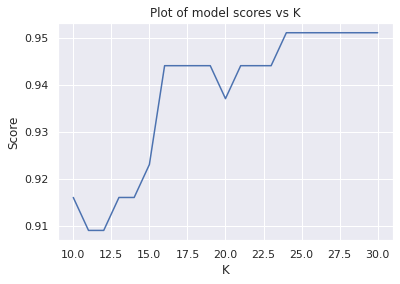

In [45]:
sns.set(style="darkgrid")
sns.lineplot(x=ks, y=scores);
plt.title('Plot of model scores vs K');
plt.xlabel('K')
plt.ylabel('Score');

#### You can see here that as 'k' increases our model score tends to increase. In this case however, our peak model performance is reached at k=25. So anything beyond ~25 doesn't really help us increase our model accuracy. So we should set our 'k' in SelectKBest to be 25.

In [46]:
X, y = split_data(df)

f = SelectKBest(score_func=f_classif, k=25)

f.fit(X, y)

SelectKBest(k=25)

In [47]:
f_pvals = pd.DataFrame(np.round(f.pvalues_, 6))
features = pd.DataFrame(X.columns)
f_scores = pd.DataFrame(f.scores_)
score_df = pd.concat([features, f_scores, f_pvals], axis=1)
    
#Assign column names
score_df.columns=['Input Features', 'F-scores', 'P-values']

#Display the score_df and filter the rows based on p-values which are greater than .05 (i.e. not significant)
score_df[score_df['P-values'] > .05]

,Input Features,F-scores,P-values
9,fractal_dimension_mean,0.093459,0.759937
11,texture_se,0.039095,0.843332
14,smoothness_se,2.557968,0.110297
18,symmetry_se,0.024117,0.876642
19,fractal_dimension_se,3.468275,0.063074


#### Point-Biserial Correlation
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://www.youtube.com/watch?v=AlFZlhVLdJs

https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

Like the ANOVA F-value, the point-biserial correlation tells a story of the data and the correlations within it. Ideally, it's used in the cases in which you have a binary variable to predict (i.e. in this case, it's diagnosis) and we have continuous data. 

We'll be using the SciPy library for this as it has a very nice built in function. 

"The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship." - SciPy Documentation (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html)

In [48]:
from scipy.stats import pointbiserialr as pbs

In [49]:
#Re-initiating the original dataframe

original_df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

wrapper = {'M':0, 'B':1}
original_df.diagnosis = original_df.diagnosis.replace(wrapper)

original_df = original_df.drop(['id', 'Unnamed: 32'], axis=1)

In [50]:
# List comprehension to run the pointbiserialr SciPy function on all columns of the dataset
pbs_out = [pbs(y, original_df[col]) for col in original_df.columns[1:]]

In [51]:
pbs_r, pbs_pval = [], []

#Creating a DataFrame to concatenate the results and view together (extracting the important values out from each tuple of pbs output)
pbs_r = pd.DataFrame([pbs_out[i][0] for i in range(len(pbs_out))])
pbs_pval = pd.DataFrame([pbs_out[i][1] for i in range(len(pbs_out))])

#Concatenating the results
df_pbs = pd.concat([features, pbs_r, np.round(pbs_pval, 5)], axis = 1)
df_pbs.columns=['Input Features', 'R value (correlation coeff.)', 'P-value']

#Filtering to view the rows with p-values < .05
df_pbs[df_pbs['P-value'] > .05]

,Input Features,R value (correlation coeff.),P-value
9,fractal_dimension_mean,0.012838,0.75994
11,texture_se,0.008303,0.84333
14,smoothness_se,0.067016,0.11030
18,symmetry_se,0.006522,0.87664
19,fractal_dimension_se,-0.077972,0.06307


Comparing this result to the previous DataFrame up above (ANOVA F-Value) we actually see nearly identical results which makes sense. These are the features in our model data that are of no use to us and can be safely discarded (i.e. they have little to no correlation to the diagnosis)

#### The goal is simply to remove any features which are seemingly unnecessary to model performance. In this case we will get rid 5 features since they have p-values greater than .05 and fail to reject the hypothesis.

In [52]:
#Get all the input feature row names, this will us to drop these columns from the main dataframe (df)
columns_to_drop = df_pbs[df_pbs['P-value'] > .05]['Input Features'].tolist()

#Perform the drop
original_df = original_df.drop(columns_to_drop, axis=1)

# Model Development

In [53]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [54]:
def scale_data(scaler, df):
    
    #Split the data
    X, y = split_data(df)
    
    #Split into training and test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 1)
    
    #Instantiate scaler object
    if scaler == 'MinMaxScaler':
        sc = MinMaxScaler()
    elif scaler == 'StandardScaler':
        sc = StandardScaler()
    elif scaler == 'RobustScaler':
        sc = RobustScaler()
        
    #Transform using given scaler
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #Output
    return X_train, X_test, y_train, y_test

#### Metrics for assessing model
Hyperparameter optimization

In [55]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,50],
            'criterion':['gini', 'entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,10,20,50],
            'solver': ['newton-cg', 'liblinear', 'saga']
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini', 'entropy'],
        }
    }
}

In [56]:
def run_gridsearch(X_train, y_train, X_test, y_test, model_params = model_params):
    scores = []
    
    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    df_model_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
    return df_model_scores

In [57]:
X, y = split_data(original_df)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [58]:
df_model_noscale_featureselection = run_gridsearch(X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [59]:
df_model_noscale_featureselection

,model,best_score,best_params
0,svm,0.962637,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.958242,"{'criterion': 'gini', 'n_estimators': 50}"
2,logistic_regression,0.962637,"{'C': 10, 'solver': 'newton-cg'}"
3,decision_tree,0.942857,{'criterion': 'gini'}


In [60]:
X, y = split_data(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [61]:
df_model_noscale_defaultdata = run_gridsearch(X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [62]:
df_model_noscale_defaultdata

,model,best_score,best_params
0,svm,0.945055,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.958242,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic_regression,0.951648,"{'C': 20, 'solver': 'newton-cg'}"
3,decision_tree,0.918681,{'criterion': 'entropy'}


#### XGBoost performed the best with our feature selection embedded (i.e. ANOVA F-value & PBC) let's re-run our pipeline now with scaling implemented.
1. StandardScaler()
2. RobustScaler()
3. MinMaxScaler()

In [63]:
def run_GS_scale(scale, df):
    X, y = split_data(df)

    X_train, X_test, y_train, y_test = scale_data(scale, df)

    df_scores = run_gridsearch(X_train, y_train, X_test, y_test)
    
    return df_scores

In [64]:
df_MinMaxScaler_scores = run_GS_scale('MinMaxScaler', original_df)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [65]:
df_MinMaxScaler_scores

,model,best_score,best_params
0,svm,0.964835,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.964835,"{'criterion': 'entropy', 'n_estimators': 10}"
2,logistic_regression,0.975824,"{'C': 10, 'solver': 'newton-cg'}"
3,decision_tree,0.940659,{'criterion': 'gini'}


In [66]:
df_StandardScaler_scores = run_GS_scale('StandardScaler', original_df)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [67]:
df_StandardScaler_scores

,model,best_score,best_params
0,svm,0.973626,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.960440,"{'criterion': 'entropy', 'n_estimators': 10}"
2,logistic_regression,0.975824,"{'C': 1, 'solver': 'newton-cg'}"
3,decision_tree,0.934066,{'criterion': 'gini'}


In [68]:
df_RobustScaler_scores = run_GS_scale('RobustScaler', original_df)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [69]:
df_RobustScaler_scores

,model,best_score,best_params
0,svm,0.971429,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.958242,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic_regression,0.982418,"{'C': 20, 'solver': 'saga'}"
3,decision_tree,0.940659,{'criterion': 'gini'}


#### Output all three dataframes and view results

In [70]:
df_StandardScaler_scores

,model,best_score,best_params
0,svm,0.973626,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.960440,"{'criterion': 'entropy', 'n_estimators': 10}"
2,logistic_regression,0.975824,"{'C': 1, 'solver': 'newton-cg'}"
3,decision_tree,0.934066,{'criterion': 'gini'}


In [71]:
df_RobustScaler_scores

,model,best_score,best_params
0,svm,0.971429,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.958242,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic_regression,0.982418,"{'C': 20, 'solver': 'saga'}"
3,decision_tree,0.940659,{'criterion': 'gini'}


In [72]:
df_MinMaxScaler_scores

,model,best_score,best_params
0,svm,0.964835,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.964835,"{'criterion': 'entropy', 'n_estimators': 10}"
2,logistic_regression,0.975824,"{'C': 10, 'solver': 'newton-cg'}"
3,decision_tree,0.940659,{'criterion': 'gini'}


#### From this we can proceed, the best scaling is RobustScaler and the best model to use is a Logistic Regression with the parameters of C=20, and 'solver' = 'saga'. We initially tested with the Logistic Regression algorthim and we can continue to use this algorithim as it is out-performing many of the other classification algorithims such as SVM, and even tree-based algorithims like decision tree classifier and random forests

# Model Evaluation / Classification Report

#### Let's make our final model with the hyperparameters listed above and run some additional analysis

In [73]:
final_model = LogisticRegression(C = 20, solver = 'saga')

In [74]:
#Instantiate model with best hyperparameters
model = LogisticRegression(C = 20, solver= 'saga')

#Split the data and scale
X_train, X_test, y_train, y_test = scale_data('RobustScaler', original_df)

#Fit the model
model.fit(X_train, y_train)

#Score the model
model.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9824561403508771

In [75]:
y_preds = model.predict(X_test)

In [76]:
print(f'The accuracy between X_test and y_test is: {model.score(X_test, y_test)}\nThe accuracy between X_train and y_train is: {model.score(X_train, y_train)}')

The accuracy between X_test and y_test is: 0.9824561403508771
The accuracy between X_train and y_train is: 0.989010989010989


No signs of extreme over-fitting either, so that's good

In [77]:
print(classification_report(y_test, y_preds, target_names=['Metastasis', 'Benign']))

              precision    recall  f1-score   support

  Metastasis       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



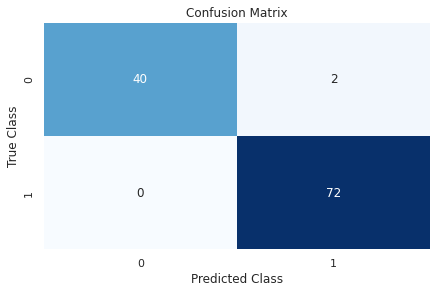

0: Metastasis (M)
1: Benign (B)


In [78]:
matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()
print('0: Metastasis (M)\n1: Benign (B)')

To conclude, we have definitely improved upon the accuracy of this model via the help of some outlier analysis techniques and feature selection techniques. Briefly summarizing, we performed brief EDA and dived deeper into the dataset by finding out which features were correlated strongly enough with the dependent variable ('diagnosis' in this case).


The model accuracy at the start with no hyperparameter tuning was improved due to hyperparameter tuning and feature selection techniques